In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

C:\Users\Richa\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
#Adding one column:
data = pd.read_csv('cancer.csv')
df = data.copy()

In [5]:
#If the person is dead, status =2 and dead = 1
#If the person is alive, status =1 and dead =0
df['dead']= np.where(df['status']==2,1, 0)
df

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223,224,1.0,188,1,77,1,1.0,80.0,60.0,NaN,3.0,0
224,225,13.0,191,1,39,1,0.0,90.0,90.0,2350.0,-5.0,0
225,226,32.0,105,1,75,2,2.0,60.0,70.0,1025.0,5.0,0
226,227,6.0,174,1,66,1,1.0,90.0,100.0,1075.0,1.0,0


#### A)	
Fit Kaplan-Meier method on time and dead columns and plot survival function.

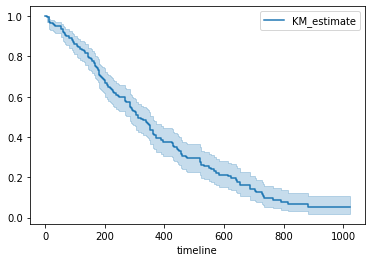

In [6]:
import lifelines
from lifelines import KaplanMeierFitter
kmf = lifelines.KaplanMeierFitter()
kmf.fit(df["time"],df["dead"])
kmf.plot_survival_function()
plt.show()

B)	Print median survival time

In [7]:
print(kmf.median_survival_time_)

310.0


C)	Print Kaplan-Meier estimates (timeline vs k-m estimate)

In [8]:
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
5.0          0.995614
11.0         0.982456
12.0         0.978070
13.0         0.969298
...               ...
840.0        0.067127
883.0        0.050346
965.0        0.050346
1010.0       0.050346
1022.0       0.050346

[187 rows x 1 columns]


D)	Create a combined plot where male and female groups’ Kaplan-Meier survival functions displayed

In [9]:
dfmale = df[df['sex']==1]
dffemale = df[df['sex']==2]

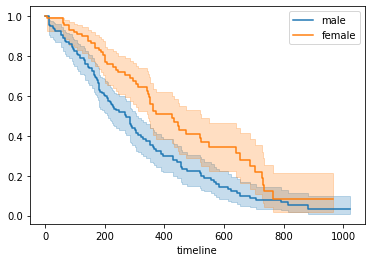

In [10]:
# Fit kmf to male
kmf.fit(dfmale['time'],dfmale['dead'],label = 'male')

# Create a plot of the survival function
surv_plot = kmf.plot()

# Fit kmf to female
kmf.fit(dffemale['time'],dffemale['dead'],label = 'female')

# Plot new survival function and show plot
kmf.plot(ax=surv_plot)
plt.show()

E)	Conduct a log-rank test and test the null hypothesis that there is no difference in survival between 2 groups, namely male vs female.

In [11]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare male and female
results = logrank_test(durations_A = dfmale['time'], 
                               durations_B = dffemale['time'], 
                               event_observed_A = dfmale['dead'], 
                               event_observed_B = dffemale['dead'])

In [12]:
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

Since the P-value is less than 0.05, we can reject the null hypothesis. There is difference in survival between the male and female groups